# Multi-Agent Researcher

This notebook demonstrates the multi-agent research approach, which uses a supervisor-researcher collaborative pattern to create comprehensive reports. The system consists of:

1. A **Supervisor Agent** that plans the overall report structure and coordinates work
2. Multiple **Research Agents** that investigate specific topics in parallel
3. A workflow that produces a structured report with introduction, body sections, and conclusion

## From repo 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/donbr/open_deep_research/src


In [2]:
#! pip install -U -q open-deep-research

# Compile the multi-agent graph

Next, we'll compile the LangGraph workflow for the multi-agent research approach. This step creates the orchestration layer that manages communication between the supervisor and research agents.

In [3]:
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.multi_agent import supervisor_builder

0.0.15


In [4]:
# Create a MemorySaver for checkpointing the agent's state
# This enables tracking and debugging of the multi-agent interaction
checkpointer = MemorySaver()
agent = supervisor_builder.compile(name="research_team", checkpointer=checkpointer)

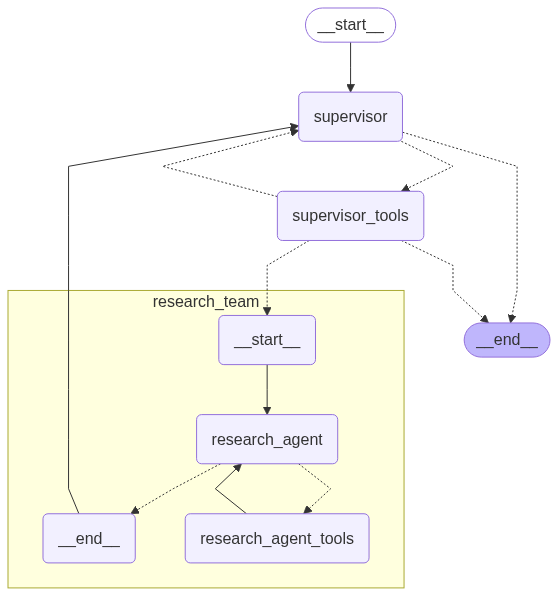

In [5]:
# Visualize the graph structure
# This shows how supervisor and research agents are connected in the workflow
display(Image(agent.get_graph(xray=1).draw_mermaid_png(max_retries=5)))

In [ ]:
# Configure and run the multi-agent system
# This sets up the model configuration and executes the research workflow

# Configure models and search API for both supervisor and researcher roles
# Note: We're using openai:o3-mini which is available through the OpenAI API
# The original notebook may have referenced 'openai:o3', but this model was never 
# officially released as a standalone product. In February 2025, OpenAI announced
# that o3 development was canceled in favor of integrating its capabilities 
# directly into GPT-5.
config = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "tavily",
    "supervisor_model": "openai:o3-mini",
    "researcher_model": "openai:o3-mini",
    }

# Set up thread configuration with the specified parameters
thread_config = {"configurable": config}

# Define the research topic as a user message
msg = [{"role": "user", "content": "What is model context protocol?"}]

# Run the multi-agent workflow with the specified configuration
response = await agent.ainvoke({"messages": msg}, config=thread_config)

In [7]:
messages = agent.get_state(thread_config).values['messages']
messages[-1].pretty_print()

================================== Ai Message ==================================

Based on the search results, Model Context Protocol (MCP) is a standardized framework—developed by Anthropic and others—to enable large language models (LLMs) and AI agents to seamlessly and securely integrate with external tools, data sources, and services. It standardizes context exchange (using a JSON-RPC 2.0 base) between an AI model (client) and external systems (servers/hosts) so that developers no longer need to write custom connectors for each service. This “universal interface” is sometimes compared to a USB-C port for AI, as it simplifies integration, reduces redundant "glue code," and encourages scalability in AI applications.

Before proceeding further, could you please clarify:
1. Are you looking for a high-level conceptual overview of what MCP is along with its significance in AI integrations, or do you need in-depth technical details (such as its architecture, protocols used, and examples) 

In [8]:
msg =  [{"role": "user", "content": "Focus on Anthropic‑backed open standard for integrating external context and tools with LLMs, give an architectural overview for developers, tell me about interesting MCP servers, compare to google Agent2Agent (A2A) protocol. write the report and dont ask any follow up questions"}]
response = await agent.ainvoke({"messages": msg}, config=thread_config)
for m in agent.get_state(thread_config).values['messages']:
    m.pretty_print()

================================ Human Message =================================

What is model context protocol?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_WRl2fe0m7cyO5tbgRs754CRH)
 Call ID: call_WRl2fe0m7cyO5tbgRs754CRH
  Args:
    queries: ['what is model context protocol? definition and uses in machine learning or AI context']
================================= Tool Message =================================
Name: tavily_search

Search results: 



--- SOURCE 1: Model Context Protocol - Wikipedia ---
URL: https://en.wikipedia.org/wiki/Model_Context_Protocol

SUMMARY:
The Model Context Protocol (MCP) is an open standard, open-source framework introduced by Anthropic to standardize the way artificial intelligence (AI) models like large language models (LLMs) integrate and share data with external tools, systems, and data sources. [1] Designed to standardize context exchange between AI assistants and software envir

/home/donbr/open_deep_research/.venv/lib/python3.13/site-packages/langgraph/checkpoint/serde/jsonplus.py:526: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  return cls(**tup[2])


In [9]:
from IPython.display import Markdown
Markdown(agent.get_state(thread_config).values['final_report'])

# Model Context Protocol: Integrating External Context and Tools with LLMs

The Model Context Protocol (MCP) represents a paradigm shift in how artificial intelligence systems integrate external data sources and tools. Developed as an Anthropic‑backed open standard, MCP offers a unified, standardized framework that eliminates the need for bespoke integration connectors. By leveraging a robust client-host-server architecture founded on JSON-RPC 2.0, MCP facilitates secure, scalable, and dynamic context inclusion for large language models (LLMs). This report dives into the architectural underpinnings of MCP, showcases interesting real-world MCP server implementations, and presents a comparative analysis with Google’s Agent2Agent (A2A) protocol. The insights presented here equip developers with the understanding needed to leverage MCP for building next-generation AI applications that require precise, on-demand data retrieval and tool integration.

## Architectural Overview of MCP

The Model Context Protocol (MCP) is designed around a robust client-host-server architecture that leverages JSON-RPC 2.0 for consistent message formatting and stateful communication. Key highlights include:

- **Client-Host-Server Roles:**
  - *Host:* Acts as the coordinator, managing client lifecycles, security, and context aggregation.
  - *Clients:* Established by the host to maintain isolated, one-to-one connections with servers, handling capability negotiation and message routing.
  - *Servers:* Provide focused functionality by exposing resources, prompts, and tools while adhering to defined security boundaries.

- **JSON-RPC 2.0 Foundation:**
  - Ensures standardized request/response exchanges.
  - Supports capability-based negotiation during initialization to determine available features.

- **Protocol Extensibility:**
  - Modular design supports the progressive addition of features.
  - Clear separation of concerns allows LLMs to interact seamlessly with external tools and data sources.

This architectural framework promotes secure, scalable integration of AI capabilities, enabling rapid deployment of diverse functionalities across various AI applications.

### Sources
1. https://modelcontextprotocol.io/specification/2025-03-26/architecture
2. https://modelcontextprotocol.io/docs/concepts/architecture
3. https://www.claudemcp.com/specification

## Anthropic‑Backed Open Standard for Context Integration

Anthropic introduced the Model Context Protocol (MCP) in late 2024 to address the long-standing challenge of fragmented AI integrations. Prior to MCP, each new tool or data source required custom connectors, creating a complex M×N problem. MCP solves this by providing a universal, open standard that acts as a “USB port for AI,” streamlining the integration process.

Key benefits include:
- **Standardization:** Unifies disparate connectors into one modular framework.
- **Interoperability:** Bridges isolated AI models with diverse data sources and enterprise tools.
- **Scalability:** Reduces development overhead and accelerates deployment across varied environments.

By turning the custom implementation model on its head, MCP simplifies the process of incorporating up-to-date context into AI workflows. This not only improves relevance and accuracy in responses but also fosters a collaborative ecosystem where innovative, secure, and scalable integrations can thrive.

### Sources
1. https://wandb.ai/onlineinference/mcp/reports/The-Model-Context-Protocol-MCP-by-Anthropic-Origins-functionality-and-impact--VmlldzoxMTY5NDI4MQ
2. https://www.axios.com/2025/04/17/model-context-protocol-anthropic-open-source
3. https://www.anthropic.com/news/model-context-protocol

## Interesting MCP Servers

Real-world MCP servers are revolutionizing AI connectivity by standardizing interactions with diverse enterprise tools. Notable implementations include:

- **Google Drive MCP Server**: Enables full-text search and secure file access, supporting various Google Workspace file types.
- **Slack MCP Server**: Provides seamless channel management, messaging, and workflow automation in Slack workspaces.
- **GitHub MCP Server**: Facilitates repository management, file operations, and code search, streamlining development processes.

These servers leverage the Model Context Protocol to expose their specific capabilities via standardized JSON-RPC APIs, decoupling AI models from direct service integration. This modular design not only improves security and scalability but also simplifies the integration of additional enterprise services such as Brave Search and Google Maps. By exposing uniform interfaces, MCP servers allow AI applications to efficiently retrieve data, trigger actions, and connect with multiple data sources in real-time.

### Sources
1. https://github.com/felores/gdrive-mcp-server
2. https://medium.com/demohub-tutorials/15-essential-mcp-servers-curated-in-2025-for-data-ai-llm-professionals-248838854b46
3. https://github.com/modelcontextprotocol/servers

## Comparison with Google Agent2Agent (A2A) Protocol

Both MCP and A2A enhance AI systems but focus on distinct interaction models. MCP (Model Context Protocol) employs a client–server architecture where hosts link language models with external tools, injecting context and executing tool calls via JSON-RPC over stdio or HTTP. This approach emphasizes precise, on-demand data retrieval and integrates seamlessly with traditional APIs, offering controlled, secure tool access through user consent and host-enforced policies.

In contrast, Google’s A2A protocol is built for direct, agent-to-agent communication. It uses Agent Cards for discovery, allowing agents to expose skills and negotiate tasks through a structured lifecycle. A2A leverages HTTP, JSON-RPC, and real-time streaming (SSE) to coordinate multi-agent workflows and dynamic task delegation.

Key trade-offs include:

- **Integration:** MCP focuses on tool and data access, while A2A centers on inter-agent collaboration.
- **Scalability & Performance:** MCP scales by adding lightweight servers; A2A supports horizontal scaling through asynchronous messaging.
- **Security:** MCP relies on host control and explicit user consent; A2A employs standard web authentication and secure discovery mechanisms.

### Sources
1. https://www.cohorte.co/blog/comparing-anthropics-model-context-protocol-mcp-vs-googles-agent-to-agent-a2a-for-ai-agents-in-business-automation
2. https://www.trickle.so/blog/google-a2a-vs-mcp
3. https://www.toolworthy.ai/blog/mcp-vs-a2a-protocol-comparison

## Developer Considerations and Best Practices

Developers implementing MCP should focus on secure, scalable, and maintainable integrations. Key guidance includes:

- **Secure Integration:** 
  - Use robust authentication (e.g., OAuth, JWT) and enforce least privilege.
  - Employ API gateways and rate limiting to minimize abuse.
  - Continuously monitor interactions with logging and anomaly detection.

- **Efficient Tool Integration:** 
  - Leverage MCP’s standardized client-server communication to connect AI models with external tools.
  - Understand dynamic tool discovery and context management to reduce custom coding.

- **Maintenance & Scalability:** 
  - Regularly update and patch MCP servers and tools to address emerging vulnerabilities.
  - Balance security measures with performance impact, particularly in zero-trust architectures.

- **Emerging Alternatives:** 
  - Contrast MCP with traditional APIs by appreciating improved context handling and modularity, while staying alert to evolving protocols that may offer enhanced security or integration ease.

This multi-layered approach enables robust, flexible AI solutions while mitigating risks inherent in dynamic external tool integrations.

### Sources
1. https://markaicode.com/mcp-api-protection-2025/
2. https://blog.treblle.com/model-context-protocol-ai-security/
3. https://techcommunity.microsoft.com/blog/microsoft-security-blog/understanding-and-mitigating-security-risks-in-mcp-implementations/

## Conclusion

In summary, the Model Context Protocol (MCP) provides a transformative, Anthropic‑backed open standard that simplifies the integration of external context and tools with large language models. With its robust, JSON-RPC 2.0 based client-host-server architecture, MCP not only streamlines interactions by eliminating the need for custom adapters but also enhances security and scalability of AI systems.

Key insights include:
- A well-defined architectural framework that divides responsibilities between MCP hosts, clients, and servers, ensuring seamless data and tool integration.
- The significant benefits of adopting an open standard that bridges traditional data silos and enables dynamic, context-aware AI behavior.
- A growing ecosystem of interesting MCP servers, covering services from productivity tools to enterprise systems, which exemplifies the protocol’s diverse applicability.
- A comparative analysis with Google’s Agent2Agent (A2A) protocol, highlighting differences in integration approaches, ecosystem support, and overall developer experience.
- Practical developer considerations, emphasizing best practices that guide efficient MCP implementation.

Together, these elements underscore MCP’s potential to become the de facto standard for connecting AI models with real-world data and services, fostering innovation and driving the next generation of context-aware applications.

Trace: 

> Note: uses 456k tokens 

User:  What is Model Context Protocol
- https://smith.langchain.com/public/d3133439-f23d-4c0b-a1a1-0866a59c4b7d/r

User:  Focus on Anthropic‑backed open standard
- https://smith.langchain.com/public/12a4ee2c-83de-4813-9c35-659c469867e8/r